In [2]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

In [3]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

In [10]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [99]:
X = adver_data[["TV", "Radio", "Newspaper"]].values
y = adver_data[["Sales"]].values

In [100]:
import numpy as np
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

In [101]:
X = (X - means) / stds

In [102]:
import numpy as np
X = np.hstack([X, np.ones((X.shape[0], 1))])

In [127]:
def mserror(y, y_pred):
    return round((sum((y - y_pred)**2))/float(y.shape[0]), 3)

In [105]:
y_median = np.array([np.median(y)]*y.shape[0]).reshape((y.shape[0], 1))
answer1 = mserror(y_median, y)
write_answer_to_file(answer1, '1.txt')

(200, 4)


In [51]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)


In [85]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 0.05379188]
 [ 0.22222731]
 [ 0.01681639]]


In [86]:
answer2 = np.dot(np.mean(X, axis=0), norm_eq_weights)[0]
print(answer2)
write_answer_to_file(answer2, '2.txt')

13.5933961454


In [87]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [88]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

4.04521507107


In [141]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    x_k = X[train_ind, :]
    y_k = y[train_ind]
    y_pred = np.dot(x_k, w)
    l = X.shape[0]
    return w + (2*eta/l)*(y_k - y_pred)*x_k

In [142]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    np.random.seed(seed)
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y, np.dot(X, w)))
        iter_num += 1
       
        if iter_num % 10000 == 0 and verbose:
            print("Iteration: ", iter_num)
       
    return w, errors

In [143]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros((X.shape[1], 1))) 

Wall time: 1.39 s


Populating the interactive namespace from numpy and matplotlib


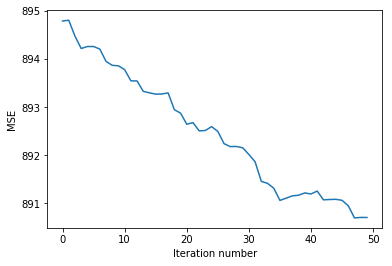

In [144]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


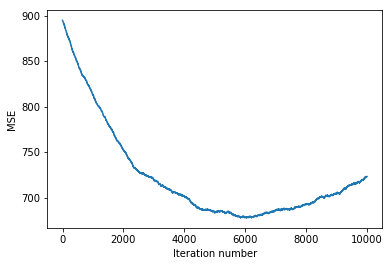

In [145]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [146]:
stoch_grad_desc_weights

array([[ 2.45603384,  1.55145261,  0.62572323,  8.83704092],
       [ 2.45603384,  1.55145261,  0.62572323,  8.83704092],
       [ 2.45603384,  1.55145261,  0.62572323,  8.83704092],
       [ 2.45603384,  1.55145261,  0.62572323,  8.83704092]])

In [149]:
stoch_errors_by_iter[-1]

723.24800000000005